In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Correcting the way to read the Excel file
df = pd.read_excel('/Users/kritsadakruapat/Desktop/mainTable/edited/JoinAndDropDup.xlsx')

# Drop duplicates based on the 'Post_ID_post' column
df.drop_duplicates(subset=['Post_ID_post'], inplace=True)

# Define the features and the target variable
features = ['NumFamousWord', 'PromotionalWordCount', 'lengthTitle', 'cost_post']
X = df[features].replace(0, np.nan).fillna(0)
y = df['CanSold']

# Initialize and fit the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display the importance DataFrame
importance_df

,Feature,Importance
2,lengthTitle,0.416246
3,cost_post,0.379444
0,NumFamousWord,0.184036
1,PromotionalWordCount,0.020274


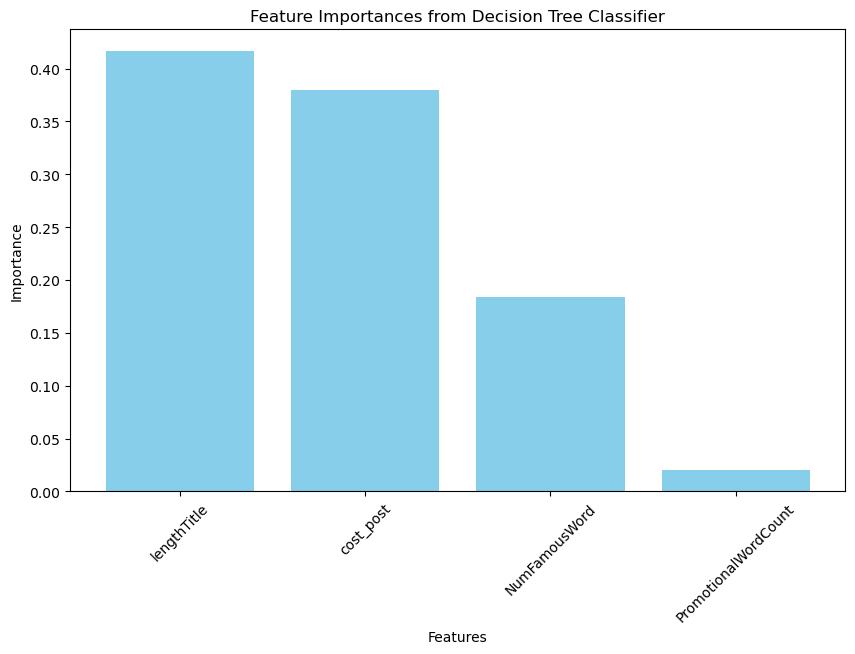

In [2]:
import matplotlib.pyplot as plt
# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree Classifier')
plt.xticks(rotation=45)
plt.show()

In [3]:
df.to_excel('edited/JoinAndDropDup.xlsx', index=False)

In [6]:
list = [46,46,74,97,43,67,83,61,81,41]
np.mean(list)



63.9

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Selecting relevant features and target variable
features = ['cost_post']  # You can add more features if relevant
X = df[features].replace(0, np.nan).fillna(0)
y = df['num_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Get the coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': logreg.coef_[0]
})

print(coefficients)

              precision    recall  f1-score   support

           0       0.37      1.00      0.53       361
           1       0.00      0.00      0.00        99
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        29
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         4
          17       0.00    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels